In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def engagement(data):
    return data["like_count"] + data["retweet_count"] + data["quote_count"] + data["reply_count"]

In [3]:
df_f = pd.read_csv("datasets/2021-2022/2021-2022_multi_dataset10.csv", index_col=None)
df_m = pd.read_csv("datasets/march_2021/march_2021_7.csv", index_col=None)

In [4]:
df_m

,tweet_id,date,text,name,username,userid,in_reply_to_tweet_id,in_reply_to_username,in_reply_to_userid,language,...,identity_attack,insult,threat,sexual_explicit,davidson,hateval,ethos,jigsaw,qian,ensemble
0,1001824999496404992,2018-05-30T13:57:47.000Z,"People of all races, religions and nationaliti...",Sanofi US,SanofiUS,183033795,NaN,NaN,NaN,en,...,0.000745,0.000332,0.000031,0.000022,0.854986,0.005950,0.042120,0.000636,0.001513,0.001513
1,1020322780410150912,2018-07-20T15:01:22.000Z,"240 characters just isn't enough space for us,...",Brodsky Organization,BrodskyOrg,52177998,NaN,NaN,NaN,en,...,0.000086,0.000163,0.000021,0.000015,0.002635,0.009392,0.000411,0.000700,0.001244,0.001244
2,1038717458788638720,2018-09-09T09:15:15.000Z,Chinese beating up workers in Gabon. @sekuru_g...,Raymond Majongwe,RMajongwe,764842910428827649,NaN,NaN,NaN,en,...,0.176705,0.010182,0.009734,0.003510,0.031699,0.190526,0.288311,0.869694,0.001646,0.001646
3,1039414455711551488,2018-09-11T07:24:52.000Z,I told you we will be colonised. This is Gabon...,Nyakunu Bota,Botanyakunu,906911020890849287,NaN,NaN,NaN,en,...,0.018573,0.011079,0.000378,0.000414,0.846836,0.967919,0.013789,0.975580,0.001941,0.001941
4,1041896810652946432,2018-09-18T03:48:51.000Z,hello I did a thing ☹️👉🏻👈🏻 https://t.co/Gb2bsB...,s⁷,spreadwings15,846779978578505728,NaN,NaN,NaN,en,...,0.000597,0.001560,0.000163,0.001307,0.002080,0.004357,0.001921,0.000664,0.001615,0.001615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153654,896523232098078720,2017-08-13T00:06:09.000Z,"""No one is born hating another person because ...",Barack Obama,BarackObama,813286,NaN,NaN,NaN,en,...,0.014834,0.002216,0.000117,0.000079,0.126779,0.012326,0.058227,0.001192,0.001196,0.001196
153655,917449083677057024,2017-10-09T17:58:01.000Z,Reminder for racists: “I’m sorry you were offe...,Alison Collins 高勵思,AliMCollins,735497173,NaN,NaN,NaN,en,...,0.018535,0.034478,0.000786,0.001490,0.100789,0.010312,0.001276,0.119230,0.001800,0.001800
153656,965361790128357377,2018-02-18T23:06:00.000Z,We really need to talk about this...\n\nList o...,Ren 仁,axegang_123,938089186237829121,NaN,NaN,NaN,en,...,0.173176,0.005020,0.001024,0.000382,0.801792,0.138593,0.002214,0.000818,0.001173,0.001173
153657,966812959778390017,2018-02-22T23:12:26.000Z,How I wound up sitting alone at this shoot: a ...,Mary Toppins,leezypeasy,18807190,NaN,NaN,NaN,en,...,0.001815,0.001769,0.061822,0.000303,0.002318,0.008563,0.000495,0.000600,0.001246,0.001246


In [5]:
df_f['date'] = pd.to_datetime(df_f['date'])

In [6]:
grouped_df = df_f.set_index('date').groupby(pd.Grouper(freq='ME')).agg({'engagement': 'sum'})
grouped_df

,engagement
date,
2011-05-31 00:00:00+00:00,12753
2011-06-30 00:00:00+00:00,0
2011-07-31 00:00:00+00:00,0
2011-08-31 00:00:00+00:00,0
2011-09-30 00:00:00+00:00,0
...,...
2022-03-31 00:00:00+00:00,261090
2022-04-30 00:00:00+00:00,66274
2022-05-31 00:00:00+00:00,878104


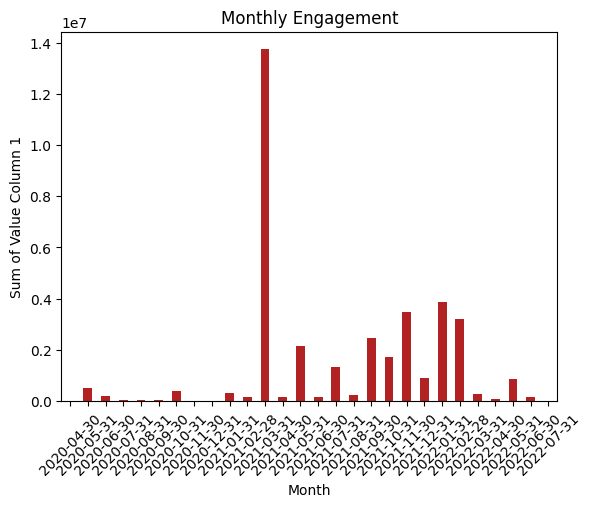

In [7]:

filtered_df = grouped_df[pd.Timestamp('2020-04-01 00:00:00+00:00'):]
filtered_df.index = filtered_df.index.date
filtered_df['engagement'].plot(kind='bar', color='firebrick')

# Adding title and labels
plt.title('Monthly Engagement')
plt.xlabel('Month')
plt.ylabel('Sum of Value Column 1')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [8]:
grouped_df = df_f.set_index('date').groupby(pd.Grouper(freq='ME')).agg({'engagement': ['sum','count']})
grouped = df_f.set_index('date').groupby(pd.Grouper(freq='ME'))

grouped_df["hate_count"] = grouped['ensemble'].apply(lambda x: (x > 0.9).sum())
grouped_df["nonhate_count"] = grouped['ensemble'].apply(lambda x: (x <= 0.9).sum())
grouped_df["hate_percent"] = round(grouped_df["hate_count"] * 100 / (grouped_df["hate_count"] + grouped_df["nonhate_count"] + 1),2)
# grouped_df["hate_percent"] = grouped_df["hate_percent"].astype(int)
grouped_df

engagement       hate_count nonhate_count  \
                                 sum count                            
date                                                                  
2011-05-31 00:00:00+00:00      12753     1          0             1   
2011-06-30 00:00:00+00:00          0     0          0             0   
2011-07-31 00:00:00+00:00          0     0          0             0   
2011-08-31 00:00:00+00:00          0     0          0             0   
2011-09-30 00:00:00+00:00          0     0          0             0   
...                              ...   ...        ...           ...   
2022-03-31 00:00:00+00:00     261090  1971         64          1907   
2022-04-30 00:00:00+00:00      66274   607         24           583   
2022-05-31 00:00:00+00:00     878104   963         32           931   
2022-06-30 00:00:00+00:00     179378   587         12           575   
2022-07-31 00:00:00+00:00       8962   109          3           106   

                          hate_percent  
                                        
date                                    
2011-05-31 00:00:00+00:00         0.00  
2011-06-30 00:00:00+00:00         0.00  
2011-07-31 00:00:00+00:00         0.00  
2011-08-31 00:00:00+00:00         0.00  
2011-09-30 00:00:00+00:00         0.00  
...                                ...  
2022-03-31 00:00:00+00:00         3.25  
2022-04-30 00:00:00+00:00         3.95  
2022-05-31 00:00:00+00:00         3.32  
2022-06-30 00:00:00+00:00         2.04  
2022-07-31 00:00:00+00:00         2.73  

[135 rows x 5 columns]

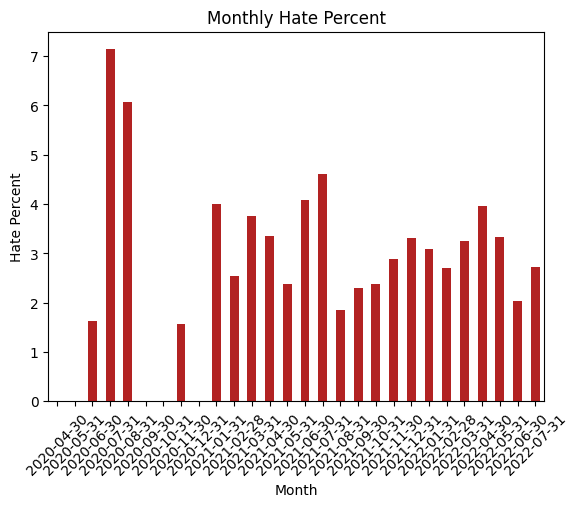

In [9]:
filtered_df = grouped_df[pd.Timestamp('2020-04-01 00:00:00+00:00'):]
filtered_df.index = filtered_df.index.date

filtered_df["hate_percent"].plot(kind='bar', color='firebrick')

# Adding title and labels
plt.title('Monthly Hate Percent')
plt.xlabel('Month')
plt.ylabel('Hate Percent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

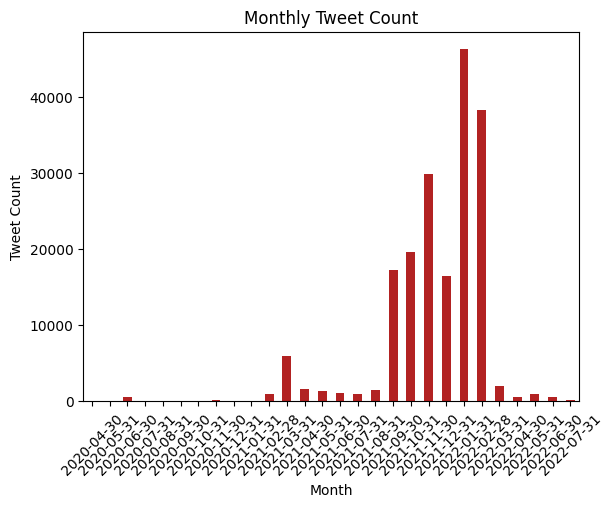

In [10]:
filtered_df = grouped_df[pd.Timestamp('2020-04-01 00:00:00+00:00'):]
filtered_df.index = filtered_df.index.date

filtered_df["engagement"]["count"].plot(kind='bar', color='firebrick')

# Adding title and labels
plt.title('Monthly Tweet Count')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [11]:
df_m['date'] = pd.to_datetime(df_f['date'])

In [12]:
grouped_df = df_m.set_index('date').groupby(pd.Grouper(freq='D')).agg({'engagement': 'sum', 'userid': 'count'})
grouped = df_m.set_index('date').groupby(pd.Grouper(freq='D'))

grouped_df['size'] = grouped.size()
grouped_df["hate_count"] = grouped['ensemble'].apply(lambda x: (x > 0.9).sum())
grouped_df["nonhate_count"] = grouped['ensemble'].apply(lambda x: (x <= 0.9).sum())
grouped_df["hate_percent"] = round(grouped_df["hate_count"] * 100 / (grouped_df["hate_count"] + grouped_df["nonhate_count"] + 1),2)
# grouped_df["hate_percent"] = grouped_df["hate_percent"].astype(int)
grouped_df

,engagement,userid,size,hate_count,nonhate_count,hate_percent
date,,,,,,
2018-06-15 00:00:00+00:00,245459,1,1,0,1,0.00
2018-06-16 00:00:00+00:00,0,0,0,0,0,0.00
2018-06-17 00:00:00+00:00,0,0,0,0,0,0.00
2018-06-18 00:00:00+00:00,0,0,0,0,0,0.00
2018-06-19 00:00:00+00:00,0,0,0,0,0,0.00
...,...,...,...,...,...,...
2022-02-04 00:00:00+00:00,209694,957,957,2,955,0.21
2022-02-05 00:00:00+00:00,337306,1450,1450,4,1446,0.28
2022-02-06 00:00:00+00:00,295699,782,782,4,778,0.51


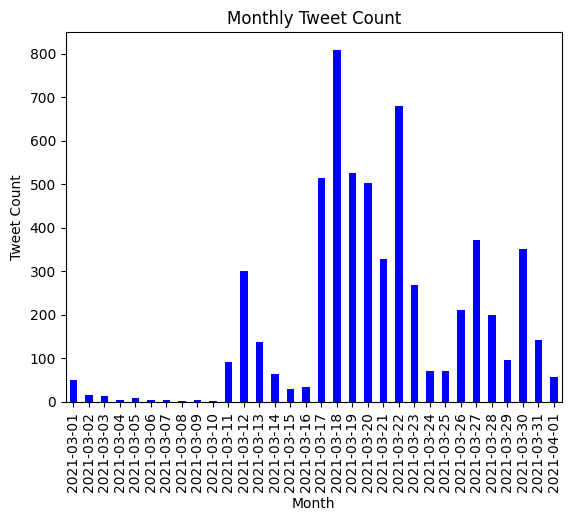

In [13]:
filtered_df = grouped_df[pd.Timestamp('2021-03-01 00:00:00+00:00'):pd.Timestamp('2021-04-01 00:00:00+00:00')]
filtered_df.index = filtered_df.index.date

filtered_df["userid"].plot(kind='bar', color='blue')

# Adding title and labels
plt.title('Monthly Tweet Count')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

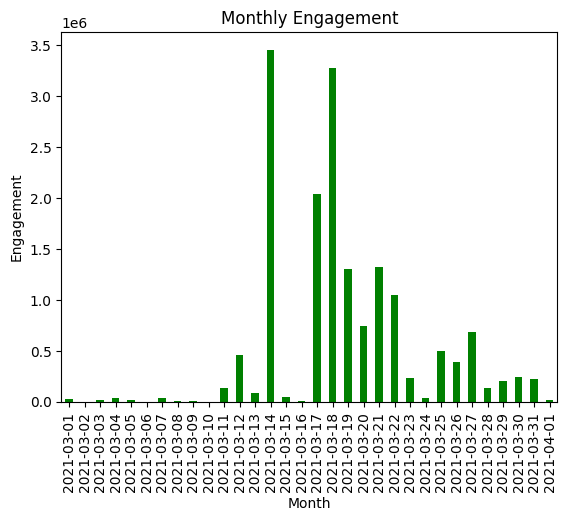

In [14]:
filtered_df = grouped_df[pd.Timestamp('2021-03-01 00:00:00+00:00'):pd.Timestamp('2021-04-01 00:00:00+00:00')]
filtered_df.index = filtered_df.index.date
filtered_df['engagement'].plot(kind='bar', color='green')

# Adding title and labels
plt.title('Monthly Engagement')
plt.xlabel('Month')
plt.ylabel('Engagement')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

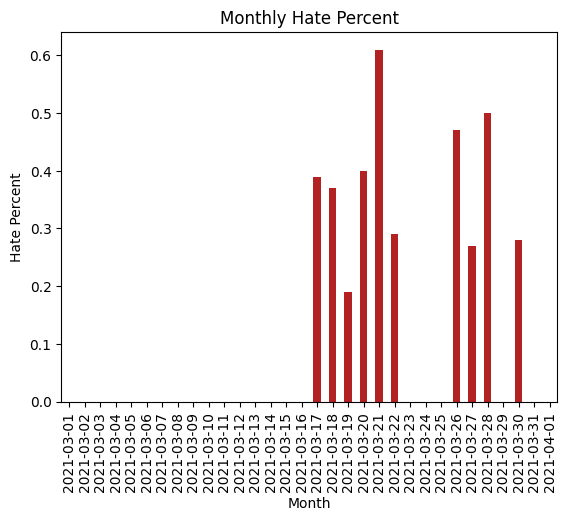

In [15]:
filtered_df = grouped_df[pd.Timestamp('2021-03-01 00:00:00+00:00'):pd.Timestamp('2021-04-01 00:00:00+00:00')]
filtered_df.index = filtered_df.index.date

filtered_df["hate_percent"].plot(kind='bar', color='firebrick')

# Adding title and labels
plt.title('Monthly Hate Percent')
plt.xlabel('Month')
plt.ylabel('Hate Percent')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [16]:
# df_f["engagement"] = engagement(df_f)
# df_m["engagement"] = engagement(df_m)

In [17]:
# df_f = df_f.replace(r'\r+|\n+|\t+',' ', regex=True)
# df_f.to_csv("datasets/2021-2022/2021-2022_multi_dataset10.csv",header=True, index=False, sep=",")
# df_m.to_csv("datasets/march_2021/march_2021_7.csv",header=True, index=False, sep=",")